In [1]:
import pygimli as pg
from pygimli.physics import ert  # the module
import pygimli.meshtools as mt

In [2]:
data = ert.load("simple.dat")
ert1 = ert.ERTManager(data)
world2 = mt.createWorld(start=[-30, 0], end=[30, -20], marker=2, worldMarker=True)
for pos in data.sensorPositions():
    world2.createNode(pos)

05/08/21 - 14:22:46 - pyGIMLi - INFO - Found 1 regions.
05/08/21 - 14:22:46 - pyGIMLi - INFO - Found 1 regions.
05/08/21 - 14:22:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/08/21 - 14:22:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


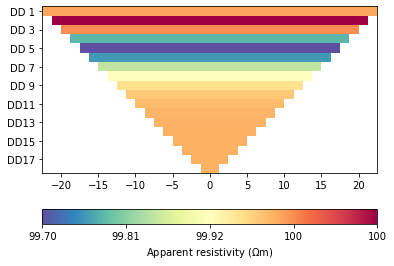

In [3]:
mesh = mt.createMesh(world2, area=.2, quality=33, marker=2)
ert1.setMesh(mesh)
rhomap = [[2, 100]]
rhomodel = pg.solver.parseArgToArray(rhomap, mesh.cellCount(), mesh)
fop = ert.ERTModelling()
fop.setData(data)
fop.setMesh(mesh)
dr = fop.response(rhomodel)
ert.showData(data, vals=dr)
fop.createJacobian(rhomodel)
J = pg.utils.gmat2numpy(fop.jacobian())

(<matplotlib.axes._subplots.AxesSubplot at 0x23159679d90>,
 <matplotlib.colorbar.Colorbar at 0x2316186be50>)

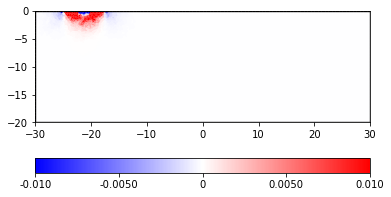

In [4]:
pg.show(fop.paraDomain, J[0,:], cMin=-0.01, cMax=0.01, cMap="bwr")

In [ ]:
grid = pg.meshtools.appendTriangleBoundary(mesh, marker=1,
                                           xbound=250, ybound=250)
print(mesh)
print(grid)
pg.show(grid, markers=True, showMesh=True)

Mesh: Nodes: 5321 Cells: 10358 Boundaries: 15678
Mesh: Nodes: 5967 Cells: 11808 Boundaries: 17774


(<matplotlib.axes._subplots.AxesSubplot at 0x23159730100>,
 <matplotlib.colorbar.Colorbar at 0x231597935e0>)

In [ ]:
ert2 = ert.ERTManager(data)
ert2.setMesh(grid)
rhomap2 = [[1, 100],[2, 100]]
rhomodel2 = pg.solver.parseArgToArray(rhomap2, grid.cellCount(), grid)
fop = ert.ERTModelling()
fop.setData(data)
fop.setMesh(grid)
fop.region(1).setBackground(True)
dr = fop.response(rhomodel)
ert.showERTData(data, vals=dr)
fop.createJacobian(rhomodel)
J2 = pg.utils.gmat2numpy(fop.jacobian())

In [ ]:
pg.show(fop.paraDomain, J2[0,:], cMin=-0.01, cMax=0.01, cMap="bwr")